Machine Learning 1 - Group Project
John Shaughnessy (sba), Alexandra Stefan (sba), Dan Ambrosa (sba20004), Robert Devery (sba)

Machine Learning 1 - CCT College Dublin - June 2021

## Problem Statement

An American gaming developer company aspires to enter the Japan market by selling their main product that is a cross platform shooter game to give competition to their Chinese counterparts. As the Chinese competitors restricted access to data, they have contracted a gaming analytics company so they can make an informed decision if to enter or not on the Japan market. 

Specifically, they want to understand how much revenue could their main product bring, if they enter the Japan market. Essentially, the company wants to know: 

• If a game is a shooter or not.

• How well will their game sale in Japan.

The gaming analytics company has gathered a large dataset with different genres of games across the Japan market and common markets as their client. Based on various market surveys; the variables in the dataset describe the sales of games by markets, genre and platform among others.

## Approach

We are interested in determining the genre of the games based on the customers business problem and project the financial outcome for the target market. This is the case of a classification of shooter games and regression problem for the financial presure. 

#### Data Preparation required for Classification

There is a variable called Genre in the dataset that contains multiple genres of game, we are interested in shooter genre for this classification. We need to create a new feature Shooter that contains values of 1 if a game in genre is shooter and 0 if the game is not a shooter. The Genre feature is no longer valuable to us so we drop it, then we use the dataset with the newly created feature for classification model.

###### Classification steps

Data exploration and cleaning
Data preparation and transformation
Model building and evaluation

#### Data Preparation required for Regression

For regression we need just the sales features and shooter games, therefor the rank, name, year, publisher features will be dropped as we are not interested in them. The Genre feature is again where we need preparation, we need to sort just the Shooter games from the genre feature, then together with the sales features we can build the regression model.

###### Regression steps

Data exploration and cleaning
Data preparation and transformation
Model building and evaluation

## Data

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include:

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 

### Data exploration and cleaning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('video_games_sales.csv')

In [3]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
print('Uniques Genre: \n',df.Genre.unique())

Uniques Genre: 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Video Game Count by Genre')

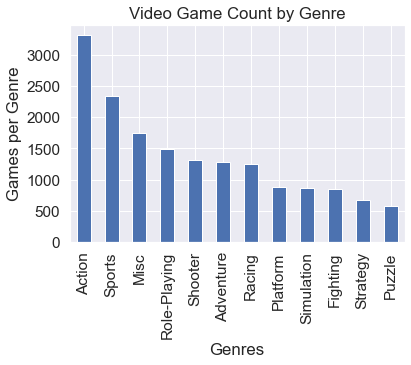

In [9]:
sns.set(font_scale=1.4)
df.Genre.value_counts().plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Games per Genre')
plt.title('Video Game Count by Genre')

In [10]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
print('Year Mode: \n',df.Year.mode(),'\n\n Publisher Mode: \n',df.Publisher.mode())

Year Mode: 
 0    2009.0
dtype: float64 

 Publisher Mode: 
 0    Electronic Arts
dtype: object


In [12]:
df.Year.fillna(df.Year.mode()[0], inplace=True) 
df.Publisher.fillna(df.Publisher.mode()[0], inplace=True)
print('Year Mode: \n',df.Year.mode(),'\n\n Publisher Mode: \n',df.Publisher.mode())

Year Mode: 
 0    2009.0
dtype: float64 

 Publisher Mode: 
 0    Electronic Arts
dtype: object


In [13]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
Platform_map = pd.DataFrame(df['Platform'])
df['Platform_map'] =  df.Platform.astype("category").cat.codes

Genre_map = pd.DataFrame(df['Genre'])
df['Genre_map'] =  df.Genre.astype("category").cat.codes

Publisher_map = pd.DataFrame(df['Publisher'])
df['Publisher_map'] =  df.Publisher.astype("category").cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           16598 non-null  int64  
 1   Name           16598 non-null  object 
 2   Platform       16598 non-null  object 
 3   Year           16598 non-null  float64
 4   Genre          16598 non-null  object 
 5   Publisher      16598 non-null  object 
 6   NA_Sales       16598 non-null  float64
 7   EU_Sales       16598 non-null  float64
 8   JP_Sales       16598 non-null  float64
 9   Other_Sales    16598 non-null  float64
 10  Global_Sales   16598 non-null  float64
 11  Platform_map   16598 non-null  int8   
 12  Genre_map      16598 non-null  int8   
 13  Publisher_map  16598 non-null  int16  
dtypes: float64(6), int16(1), int64(1), int8(2), object(4)
memory usage: 1.5+ MB


In [15]:
df = df.drop(['Platform','Genre','Publisher'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           16598 non-null  int64  
 1   Name           16598 non-null  object 
 2   Year           16598 non-null  float64
 3   NA_Sales       16598 non-null  float64
 4   EU_Sales       16598 non-null  float64
 5   JP_Sales       16598 non-null  float64
 6   Other_Sales    16598 non-null  float64
 7   Global_Sales   16598 non-null  float64
 8   Platform_map   16598 non-null  int8   
 9   Genre_map      16598 non-null  int8   
 10  Publisher_map  16598 non-null  int16  
dtypes: float64(6), int16(1), int64(1), int8(2), object(1)
memory usage: 1.1+ MB


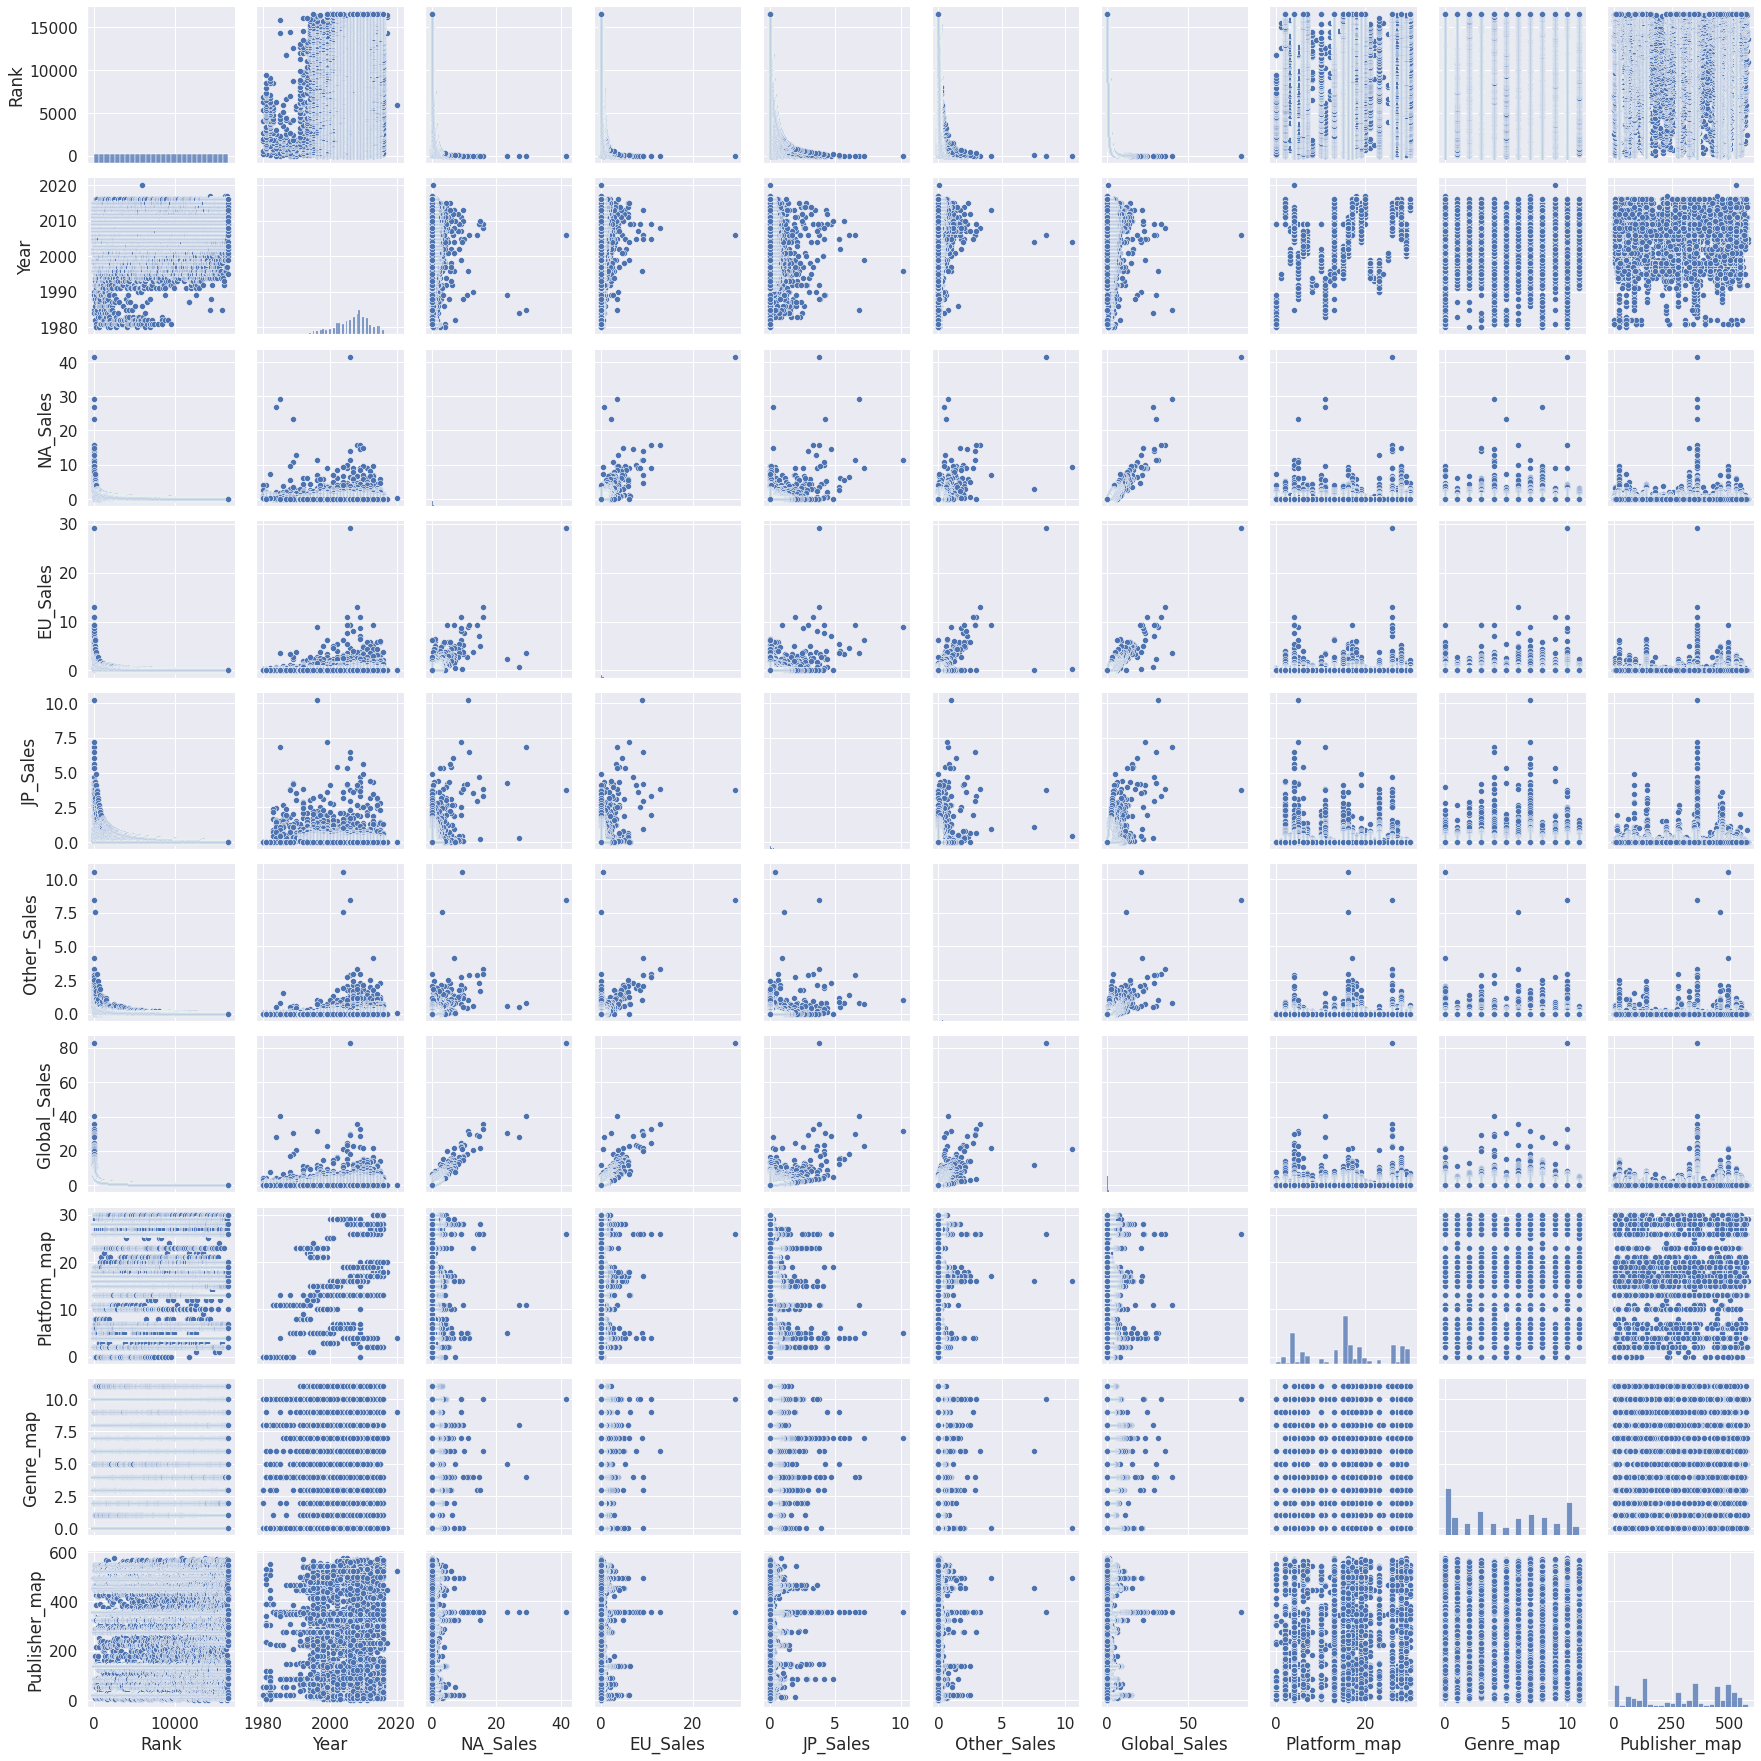

In [16]:
import seaborn as sns
sns.pairplot(df)

In [16]:
cor = df.select_dtypes(exclude=['object']).corr()
cor

Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank           1.000000  0.177803 -0.401362 -0.379123 -0.267785    -0.332986   
Year           0.177803  1.000000 -0.091454  0.005208 -0.170139     0.040322   
NA_Sales      -0.401362 -0.091454  1.000000  0.767727  0.449787     0.634737   
EU_Sales      -0.379123  0.005208  0.767727  1.000000  0.435584     0.726385   
JP_Sales      -0.267785 -0.170139  0.449787  0.435584  1.000000     0.290186   
Other_Sales   -0.332986  0.040322  0.634737  0.726385  0.290186     1.000000   
Global_Sales  -0.427407 -0.075303  0.941047  0.902836  0.611816     0.748331   
Platform_map  -0.083953  0.165887  0.041536  0.047158 -0.078207     0.055061   
Genre_map     -0.053018 -0.123476  0.017435  0.016481  0.030085     0.009731   
Publisher_map -0.020102  0.031878  0.003377  0.011835  0.051668     0.013616   

               Global_Sales  Platform_map  Genre_map  Publisher_map  
Rank              -0.427407     -0.083953  -0.053018      -0.020102  
Year              -0.075303      0.165887  -0.123476       0.031878  
NA_Sales           0.941047      0.041536   0.017435       0.003377  
EU_Sales           0.902836      0.047158   0.016481       0.011835  
JP_Sales           0.611816     -0.078207   0.030085       0.051668  
Other_Sales        0.748331      0.055061   0.009731       0.013616  
Global_Sales       1.000000      0.028213   0.021671       0.017479  
Platform_map       0.028213      1.000000   0.029061      -0.012544  
Genre_map          0.021671      0.029061   1.000000      -0.050322  
Publisher_map      0.017479     -0.012544  -0.050322       1.000000

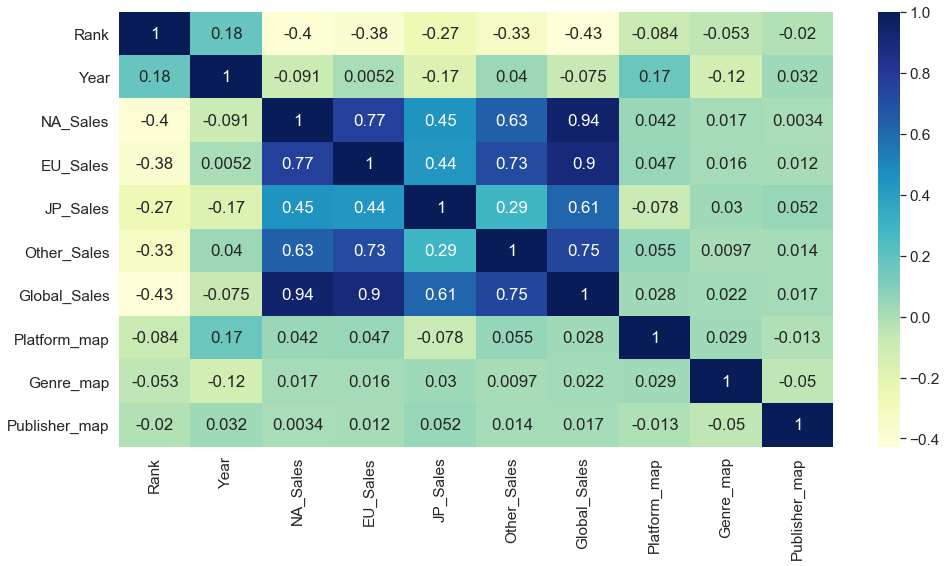

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [18]:
df.head()

Rank                      Name    Year  NA_Sales  EU_Sales  JP_Sales  \
0     1                Wii Sports  2006.0     41.49     29.02      3.77   
1     2         Super Mario Bros.  1985.0     29.08      3.58      6.81   
2     3            Mario Kart Wii  2008.0     15.85     12.88      3.79   
3     4         Wii Sports Resort  2009.0     15.75     11.01      3.28   
4     5  Pokemon Red/Pokemon Blue  1996.0     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Platform_map  Genre_map  Publisher_map  
0         8.46         82.74            26         10            359  
1         0.77         40.24            11          4            359  
2         3.31         35.82            26          6            359  
3         2.96         33.00            26         10            359  
4         1.00         31.37             5          7            359

### Data preparation and transformation 

In [91]:
game=pd.read_csv('video_games_sales.csv')
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [92]:
game.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [93]:
game.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [94]:
game['Shooter'] = [1 if x == 'Shooter' else 0 for x in game['Genre']]
game.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Shooter  
0     41.49     29.02      3.77         8.46         82.74        0  
1     29.08      3.58      6.81         0.77         40.24        0  
2     15.85     12.88      3.79         3.31         35.82        0  
3     15.75     11.01      3.28         2.96         33.00        0  
4     11.27      8.89     10.22         1.00         31.37        0

In [95]:
game.Shooter.value_counts()

0    15288
1     1310
Name: Shooter, dtype: int64

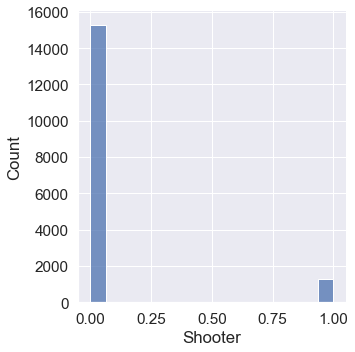

In [96]:
sns.displot(game, x='Shooter')

In [97]:
game.Year.fillna(game.Year.mode()[0], inplace=True) 
game.Publisher.fillna(game.Publisher.mode()[0], inplace=True) 
game.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Shooter         0
dtype: int64

In [98]:
x = game.drop(['Genre',"Shooter"], axis = 1)        
y = game.Shooter
x.shape, y.shape

((16598, 10), (16598,))

In [99]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify= y)
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16598, 10), (16598,), (11618, 10), (4980, 10), (11618,), (4980,))

In [100]:
numerical = ['Rank', 'Year','NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales','Global_Sales']

categorical = ['Name',"Platform", "Publisher"]

In [101]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ss = Pipeline(steps=[('ss', StandardScaler())])
ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore',sparse=False))])#,drop='first'

In [102]:
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(transformers=[('cont', ss, numerical),('cat', ohe, categorical)])

### Classification models (building, evaluation, prediction)

In [103]:
from sklearn.tree import DecisionTreeClassifier

dtree_pipe = Pipeline(steps=[('preprocess', preprocess),('classifier', DecisionTreeClassifier())])

In [104]:
dtree_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['Rank', 'Year', 'NA_Sales',
                                                   'EU_Sales', 'JP_Sales',
                                                   'Other_Sales',
                                                   'Global_Sales']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Name', 'Platform',
                                                   'Pu

In [105]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, dtree_pipe.predict(x_train))
test_acc = accuracy_score(y_test, dtree_pipe.predict(x_test))

print('Train Accuracy: {}'.format(train_acc))
print('Test Accuracy: {}'.format(test_acc))
print('\n')

from sklearn import metrics

y_pred = dtree_pipe.predict(x_test)

print("Accuracy: {:.2f}".format( metrics.accuracy_score(y_test, y_pred) ))

Train Accuracy: 1.0
Test Accuracy: 0.9251004016064257


Accuracy: 0.93


NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

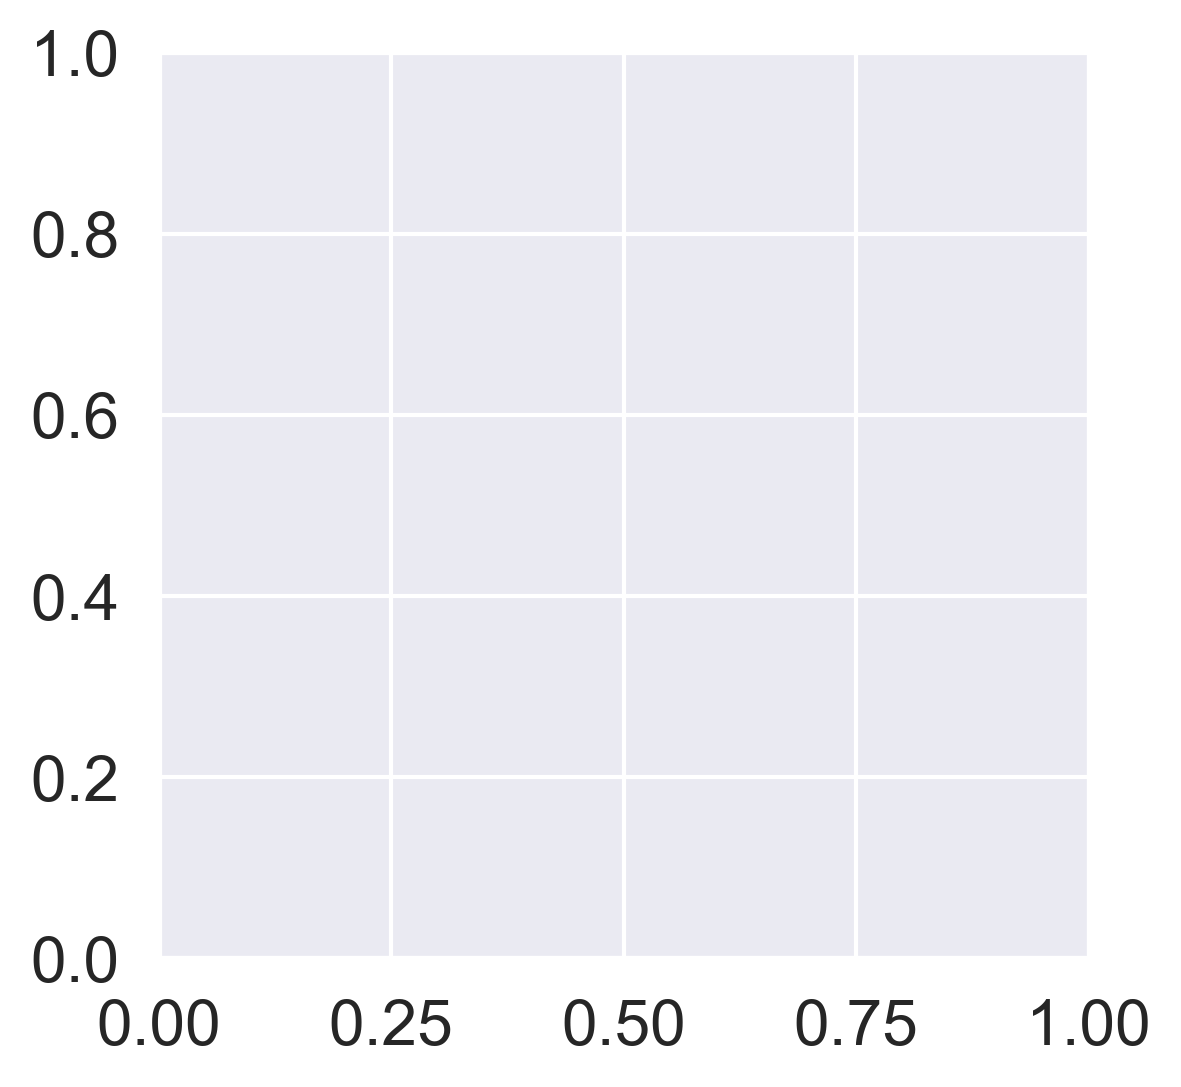

In [112]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtree_pipe.fit(x_train, y_train),
           filled = True);

In [35]:
print(' Prediction:\n',y_pred,'\n\n True Value:\n', y_test.to_numpy())

 Prediction:
 [0 0 0 ... 0 0 0] 

 True Value:
 [0 0 1 ... 0 0 0]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True)
dtree_cv = cross_val_score(dtree_pipe, x, y, scoring = 'accuracy', cv = kf).mean()

print(" Accuracy: {:.2f}".format( dtree_cv ))

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt = 'g', annot_kws = {'size':20})
plt.xlabel('Prediction', fontsize = 18)
plt.ylabel('True Value', fontsize = 18)
plt.title('DecisionTree Confusion Matrix', fontsize = 18)

Text(0, 0.5, 'Views')

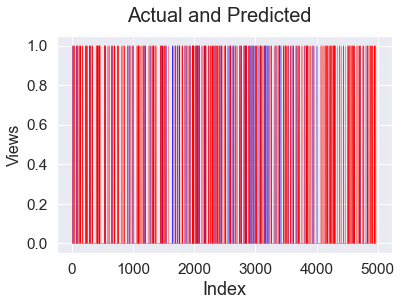

In [36]:
c = [i for i in range(1,4981, 1)]
fig = plt.figure()
plt.plot(c,y_pred, color = "blue", linewidth = 0.2, linestyle = "-")
plt.plot(c,y_test, color = "red",  linewidth = 0.2, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views')

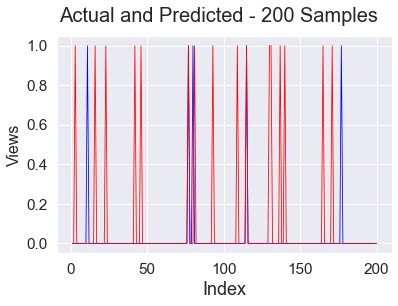

In [37]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,y_pred[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

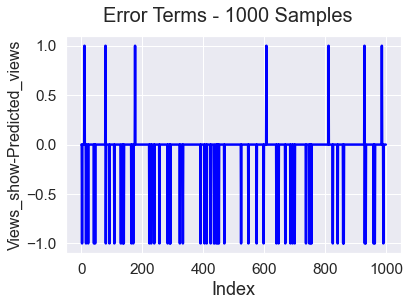

In [38]:
# Error terms
c = [i for i in range(1, 1001, 1)]
fig = plt.figure()
plt.plot(c,y_pred[:1000] - y_test[:1000], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 1000 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)  

In [40]:
from sklearn.ensemble import RandomForestClassifier

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify= y)

rf_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier(n_estimators=1000, max_samples=1000))
])

rf_pipe.fit(x2_train, y2_train)

train_acc2 = accuracy_score(y2_train, rf_pipe.predict(x2_train))
test_acc2 = accuracy_score(y2_test, rf_pipe.predict(x2_test))

print('Train Accuracy: {}'.format(train_acc2))
print('Test Accuracy: {}'.format(test_acc2))
print('\n')

y2_pred = rf_pipe.predict(x2_test)

print("Accuracy: {:.2f}".format( metrics.accuracy_score(y2_test, y2_pred) ))

Train Accuracy: 0.9214331619537275
Test Accuracy: 0.9209638554216868


Accuracy: 0.92


In [41]:
print(' Prediction:\n',y2_pred,'\n\n True Value:\n', y2_test.to_numpy())

 Prediction:
 [0 0 0 ... 0 0 0] 

 True Value:
 [0 0 0 ... 0 0 0]


In [ ]:
x2 = x
y2 = y

rfr = rf_pipe.fit(x2, y2)

kf2 = KFold(n_splits = 5, shuffle = True)

rfr_cv = cross_val_score(rfr, x2, y2, scoring = 'accuracy', cv = kf2).mean()

print(" Accuracy: {:.2f}".format( rfr_cv ))

In [ ]:
cm2 = confusion_matrix(y2_test, y2_pred)

sns.heatmap(cm2,  cmap= 'PuBu', annot=True, fmt = 'g', annot_kws = {'size':20})
plt.xlabel('Prediction', fontsize = 18)
plt.ylabel('True Value', fontsize = 18)
plt.title('   RandomForest Confusion Matrix', fontsize = 18)

Text(0, 0.5, 'Views')

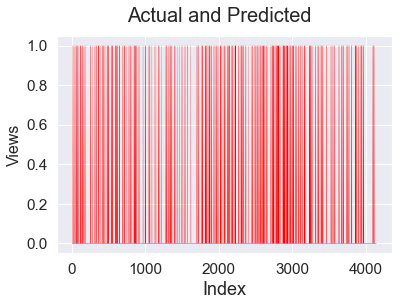

In [42]:
c = [i for i in range(1,4151, 1)]
fig = plt.figure()
plt.plot(c,y2_pred, color = "blue", linewidth = 0.2, linestyle = "-")
plt.plot(c,y2_test, color = "red",  linewidth = 0.2, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views')

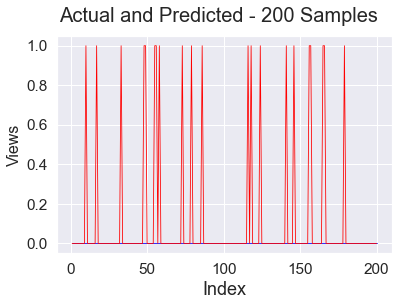

In [43]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,y2_pred[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y2_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

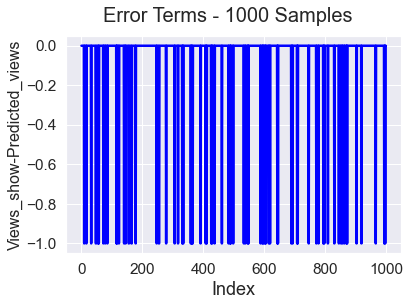

In [44]:
c = [i for i in range(1, 1001, 1)]
fig = plt.figure()
plt.plot(c,y2_pred[:1000] - y2_test[:1000], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 1000 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)  

Text(0, 0.5, 'Views_show-Predicted_views')

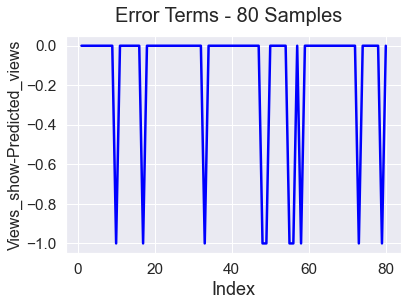

In [45]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c,y2_pred[:80] - y2_test[:80], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 80 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)  

In [46]:
from sklearn.ensemble import AdaBoostClassifier

x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify= y)

ada_boost_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', AdaBoostClassifier())
])

ada_boost_pipe.fit(x3_train, y3_train)

train_acc3 = accuracy_score(y3_train, ada_boost_pipe.predict(x3_train))
test_acc3 = accuracy_score(y3_test, ada_boost_pipe.predict(x3_test))

print('Train Accuracy: {}'.format(train_acc3))
print('Test Accuracy: {}'.format(test_acc3))
print('\n')

y3_pred = ada_boost_pipe.predict(x3_test)

print("Accuracy: {:.2f}".format( metrics.accuracy_score(y3_test, y3_pred) ))

Train Accuracy: 0.9258924536827835
Test Accuracy: 0.9210843373493975


Accuracy: 0.92


In [47]:
print(' Prediction:\n',y3_pred,'\n\n True Value:\n', y3_test.to_numpy())

 Prediction:
 [0 0 0 ... 0 0 0] 

 True Value:
 [0 0 0 ... 0 0 0]


In [ ]:
x3 = x
y3 = y

adb = ada_boost_pipe.fit(x3, y3)

kf3 = KFold(n_splits = 5, shuffle = True)

adb_cv = cross_val_score(adb, x3, y3, scoring = 'accuracy', cv = kf3).mean()

print(" Accuracy: {:.2f}".format( adb_cv ))

In [ ]:
cm3 = confusion_matrix(y3_test, y3_pred)

sns.heatmap(cm3,  cmap= 'PuBu', annot=True, fmt = 'g', annot_kws = {'size':20})
plt.xlabel('Prediction', fontsize = 18)
plt.ylabel('True Value', fontsize = 18)
plt.title('AdaBoost Confusion Matrix', fontsize = 18)

Text(0, 0.5, 'Views')

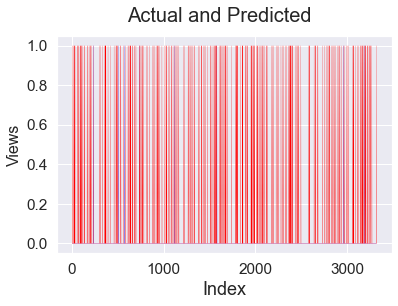

In [48]:
c = [i for i in range(1,3321, 1)]
fig = plt.figure()
plt.plot(c,y3_pred, color = "blue", linewidth = 0.2, linestyle = "-")
plt.plot(c,y3_test, color = "red",  linewidth = 0.2, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views')

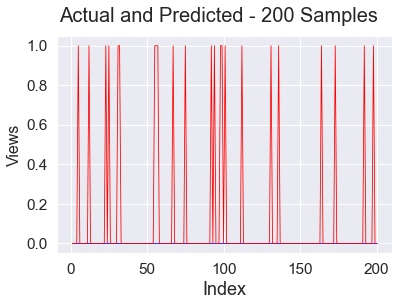

In [49]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,y3_pred[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y3_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

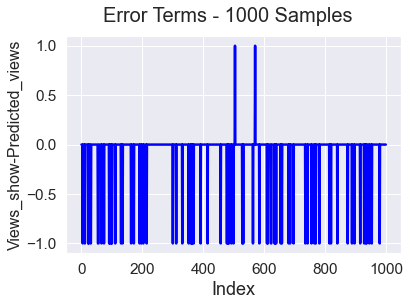

In [50]:
c = [i for i in range(1, 1001, 1)]
fig = plt.figure()
plt.plot(c,y3_pred[:1000] - y3_test[:1000], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 1000 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)  

Text(0, 0.5, 'Views_show-Predicted_views')

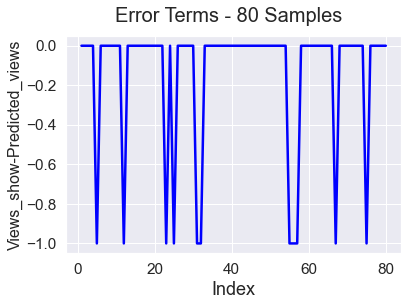

In [51]:
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c,y3_pred[:80] - y3_test[:80], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 80 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)  

In [52]:
models = [('Decision Tree', train_acc, test_acc),
          ('Random Forest', train_acc2, test_acc2),
         ('AdaBoost', train_acc3, test_acc3)]

models_df = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
models_df

Model  Training Accuracy  Test Accuracy
0  Decision Tree           1.000000       0.922691
1  Random Forest           0.921433       0.920964
2       AdaBoost           0.925892       0.921084

In [53]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(name='Training', x=models_df.Model, y=models_df['Training Accuracy'], yaxis='y', offsetgroup=1),
        go.Bar(name='Test', x=models_df.Model, y=models_df['Test Accuracy'], yaxis='y2', offsetgroup=2)
    ],
    layout={
        'yaxis': {'title': 'Training'},
        'yaxis2': {'title': 'Test', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

### Regression models (building, evaluation, prediction)


In [54]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
%matplotlib inline
import numpy as np

In [55]:
df2 = pd.read_csv('video_games_sales.csv')
df2.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [56]:
df2 = df2[['Genre', 'EU_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales', 'Global_Sales']]
df2.head()

Genre  EU_Sales  JP_Sales  NA_Sales  Other_Sales  Global_Sales
0        Sports     29.02      3.77     41.49         8.46         82.74
1      Platform      3.58      6.81     29.08         0.77         40.24
2        Racing     12.88      3.79     15.85         3.31         35.82
3        Sports     11.01      3.28     15.75         2.96         33.00
4  Role-Playing      8.89     10.22     11.27         1.00         31.37

In [57]:
df_shooter = df2[df2['Genre'] == 'Shooter']
df_shooter.head()

Genre  EU_Sales  JP_Sales  NA_Sales  Other_Sales  Global_Sales
9   Shooter      0.63      0.28     26.93         0.47         28.31
29  Shooter      4.28      0.13      9.03         1.32         14.76
31  Shooter      3.73      0.11      9.67         1.13         14.64
33  Shooter      5.81      0.35      5.77         2.31         14.24
34  Shooter      5.88      0.65      4.99         2.52         14.03

In [58]:
df_shooter = df_shooter.drop(['Genre'], axis = 1)

In [59]:
target_column = ['JP_Sales'] 
predictors = list(set(list(df_shooter.columns))-set(target_column))
df_shooter[predictors] = df_shooter[predictors]/df_shooter[predictors].max()
df_shooter.describe()

EU_Sales     JP_Sales     NA_Sales  Other_Sales  Global_Sales
count  1310.000000  1310.000000  1310.000000  1310.000000   1310.000000
mean      0.040670     0.029221     0.016514     0.031107      0.027972
std       0.093400     0.102398     0.044603     0.079171      0.064192
min       0.000000     0.000000     0.000000     0.000000      0.000353
25%       0.001701     0.000000     0.001114     0.000000      0.002826
50%       0.008503     0.000000     0.004456     0.007937      0.008124
75%       0.039116     0.010000     0.013739     0.027778      0.025698
max       1.000000     1.440000     1.000000     1.000000      1.000000

### Linear Regression

In [60]:
X = df_shooter[predictors].values
y = df_shooter[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((917, 4), (393, 4), (917, 1), (393, 1))

In [61]:
linear = LinearRegression()  
linear.fit(X_train, y_train)

LinearRegression()

In [62]:
pred_train_linear = linear.predict(X_train)
print('Training')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, pred_train_linear)))
linear_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(linear.coef_)-1)*(1 - r2_score(y_train, pred_train_linear)))
print("Adjusted r2 score: {:.2%}".format(linear_adjusted_r))

print('\n')

pred_test_linear = linear.predict(X_test)
print('Testing')
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_test_linear)))
linear_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(linear.coef_)-1)*(1 - r2_score(y_test, pred_test_linear)))
print("Adjusted r2 score: {:.2%}".format(linear_adjusted_r))

Training
Root Mean Squared Error: 0.00581378676683326
Adjusted r2 score: 99.75%


Testing
Root Mean Squared Error: 0.006380262499896065
Adjusted r2 score: 98.57%


Text(0, 0.5, 'Views')

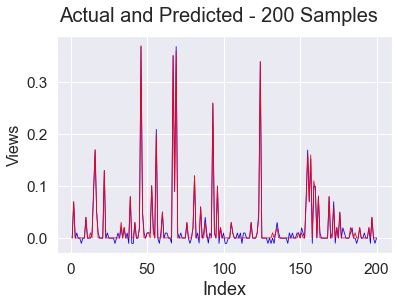

In [72]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_linear[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

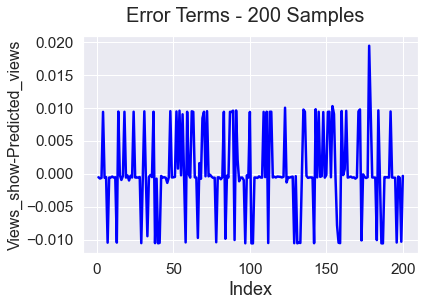

In [73]:
c = [i for i in range(1, 201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_linear[:200] - y_test[:200], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 200 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)

### Ridge

In [74]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

pred_train_ridge = ridge.predict(X_train)
print('Training')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, pred_train_ridge)))
ridge_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(ridge.coef_)-1)*(1 - r2_score(y_train, pred_train_ridge)))
print("Adjusted r2 score: {:.2%}".format(ridge_adjusted_r))

print('\n')

pred_test_ridge = ridge.predict(X_test)
print('Testing')
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_test_ridge)))
ridge_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(ridge.coef_)-1)*(1 - r2_score(y_test, pred_test_ridge)))
print("Adjusted r2 score: {:.2%}".format(ridge_adjusted_r))

Training
Root Mean Squared Error: 0.014712566705749816
Adjusted r2 score: 98.42%


Testing
Root Mean Squared Error: 0.008087829453437997
Adjusted r2 score: 97.70%


Text(0, 0.5, 'Views')

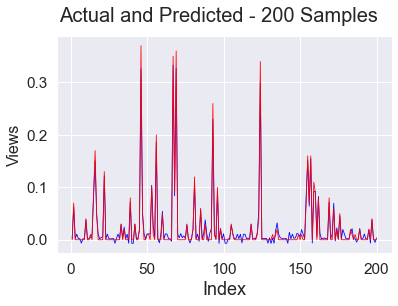

In [75]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_ridge[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

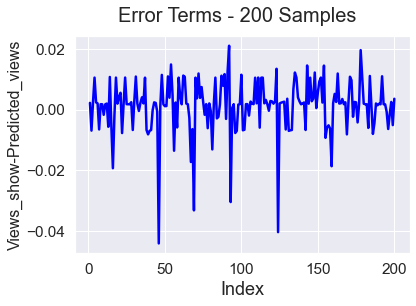

In [76]:
c = [i for i in range(1, 201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_ridge[:200] - y_test[:200], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 200 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)

### Lasso

In [77]:
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_train, y_train) 

pred_train_lasso = lasso.predict(X_train)
print('Training')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, pred_train_lasso)))
lasso_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(lasso.coef_)-1)*(1 - r2_score(y_train, pred_train_lasso)))
print("Adjusted r2 score: {:.2%}".format(lasso_adjusted_r))

print('\n')

pred_test_lasso = lasso.predict(X_test)
print('Testing')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_test_lasso)))
lasso_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(lasso.coef_)-1)*(1 - r2_score(y_test, pred_test_lasso)))
print("Adjusted r2 score: {:.2%}".format(lasso_adjusted_r))

Training
Root Mean Squared Error: 0.010031234867791176
Adjusted r2 score: 99.26%


Testing
Root Mean Squared Error: 0.006837499904693562
Adjusted r2 score: 98.35%


Text(0, 0.5, 'Views')

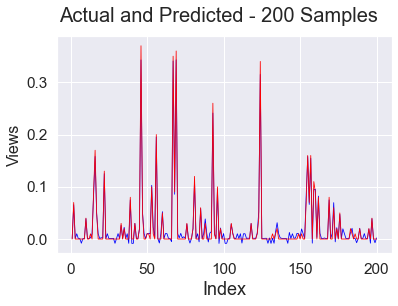

In [78]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_lasso[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

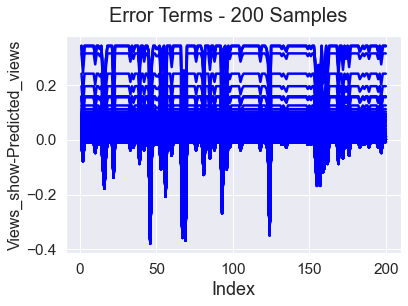

In [79]:
c = [i for i in range(1, 201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_lasso[:200] - y_test[:200], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 200 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)

### ElasticNet

In [80]:
enet = ElasticNet(alpha = 0.00001)
enet.fit(X_train, y_train)

pred_train_enet = enet.predict(X_train)
print('Training')
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, pred_train_enet)))
enet_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(enet.coef_)-1)*(1 - r2_score(y_train, pred_train_enet)))
print("Adjusted r2 score: {:.2%}".format(enet_adjusted_r))

print('\n')

pred_test_enet = enet.predict(X_test)
print('Testing')
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, pred_test_enet)))
enet_adjusted_r = 1 - ((len(y)-1)/(len(y)-len(enet.coef_)-1)*(1 - r2_score(y_test, pred_test_enet)))
print("Adjusted r2 score: {:.2%}".format(enet_adjusted_r))

Training
Root Mean Squared Error: 0.04534993767044606
Adjusted r2 score: 84.92%


Testing
Root Mean Squared Error: 0.020357792574856325
Adjusted r2 score: 85.37%


Text(0, 0.5, 'Views')

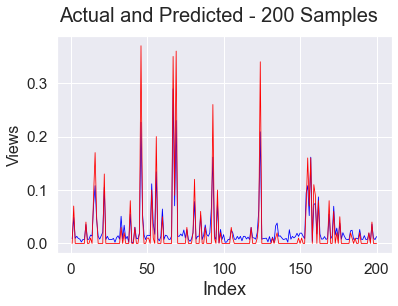

In [86]:
c = [i for i in range(1,201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_enet[:200], color = "blue", linewidth = 0.8, linestyle = "-")
plt.plot(c,y_test[:200], color = "red",  linewidth = 0.8, linestyle = "-")
fig.suptitle('Actual and Predicted - 200 Samples', fontsize = 20)           
plt.xlabel('Index', fontsize = 18)                              
plt.ylabel('Views', fontsize = 16)

Text(0, 0.5, 'Views_show-Predicted_views')

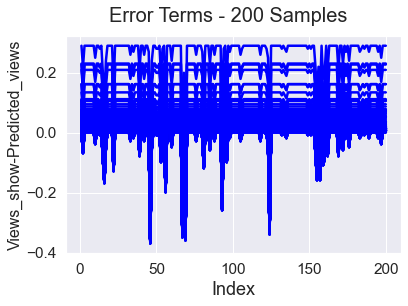

In [88]:
c = [i for i in range(1, 201, 1)]
fig = plt.figure()
plt.plot(c,pred_test_enet[:200] - y_test[:200], color = "blue", linewidth = 2.5, linestyle = "-")
fig.suptitle('Error Terms - 200 Samples', fontsize = 20)              # Plot heading 
plt.xlabel('Index', fontsize = 18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize = 16)

## Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Linear

In [82]:
fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
#linear_score = cross_val_score(linear, X_train, y_train, scoring = 'r2', cv = fold)
adj_linear_score = 1 - ((len(y)-1)/(len(y)-len(linear.coef_)-1)*(1 - cross_val_score(linear, X_train, y_train, scoring = 'r2', cv = fold)))
           
for number, score in enumerate(adj_linear_score, 1):
    print(number, "{:.2%}".format(score))  

1 98.90%
2 99.78%
3 99.36%
4 99.63%
5 99.18%
6 99.83%
7 99.64%
8 99.87%
9 99.72%
10 99.88%


### Ridge

In [83]:
adj_ridge_score = 1 - ((len(y)-1)/(len(y)-len(ridge.coef_)-1)*(1 - cross_val_score(ridge, X_train, y_train, scoring = 'r2', cv = fold)))

for number, score in enumerate(adj_ridge_score, 1):
    print(number, "{:.2%}".format(score))

1 97.42%
2 98.20%
3 98.37%
4 98.08%
5 97.79%
6 97.71%
7 99.08%
8 98.01%
9 98.25%
10 97.11%


### Lasso

In [84]:
adj_lasso_score =  1 - ((len(y)-1)/(len(y)-len(lasso.coef_)-1)*(1 - cross_val_score(lasso, X_train, y_train, scoring = 'r2', cv = fold)))

for number, score in enumerate(adj_lasso_score, 1):
    print(number, "{:.2%}".format(score)) 

1 98.52%
2 99.29%
3 99.16%
4 99.31%
5 98.80%
6 99.02%
7 99.54%
8 99.09%
9 99.29%
10 98.30%


### ElasticNet

In [85]:
adj_enet_score =  1 - ((len(y)-1)/(len(y)-len(enet.coef_)-1)*(1 - cross_val_score(enet, X_train, y_train, scoring = 'r2', cv = fold)))

for number, score in enumerate(adj_enet_score, 1):
    print(number, "{:.2%}".format(score))

1 83.47%
2 85.09%
3 87.34%
4 84.96%
5 84.41%
6 81.27%
7 93.49%
8 83.32%
9 87.26%
10 77.45%
